<center><font size="19" ><b>Pooling with C++</b></font></center>

<img src='imgs/cpu_cpp.svg' width='500'/>

### Pagani Huayra

![raw](./imgs/pagani.jpg)

In [4]:
from AI_Decomposed import * 

### grab image

In [5]:
from PIL import Image
image_file = './imgs/pagani.jpg'
[height, width, red,green,blue] = image_meta(image_file)

## C++   pooling  - extern "C"

![cpp](./imgs/cpp.png)

<center><font size="10" ><b>C++ from Python</b></font></center>

<img src='imgs/python_cpp.svg' width='400'/>

In [6]:
import ctypes
from ctypes import *
import numpy as np

# create reference to C++ fucntion
cpp_function_ptr = cdll.LoadLibrary('./cpp/cmake-build-debug/libconvolution.so').recurse_convolution

def native_recurse_pooling(mat, width, recurse_cnt, use_max, function_ptr):    
    height = (int)(len(mat) / width)
    # create pointer array
    ptr_param = pointer((ctypes.c_int * len(mat))(*mat))

    # calculate array size after function call
    returned_height = height - recurse_cnt
    returned_width  = width - recurse_cnt
    returned_convolution_array_size = returned_height * returned_width
    # define return type of integer pointer array
    function_ptr.restype = ctypes.POINTER(ctypes.c_int * (returned_convolution_array_size))
    # conver boolean to int
    f=0
    if use_max:
       f=1 
    # actuall call to C++ code
    ptr_array_convolution = function_ptr(ptr_param, width, height, recurse_cnt, f)
    # convert int pointer array to Python list
    ret_convo = np.ctypeslib.as_array( ptr_array_convolution.contents ,shape=(1,)).astype(int).tolist()
    # return Python list of convolution pixels
    return ret_convo

# C++ speed

1.1  seconds


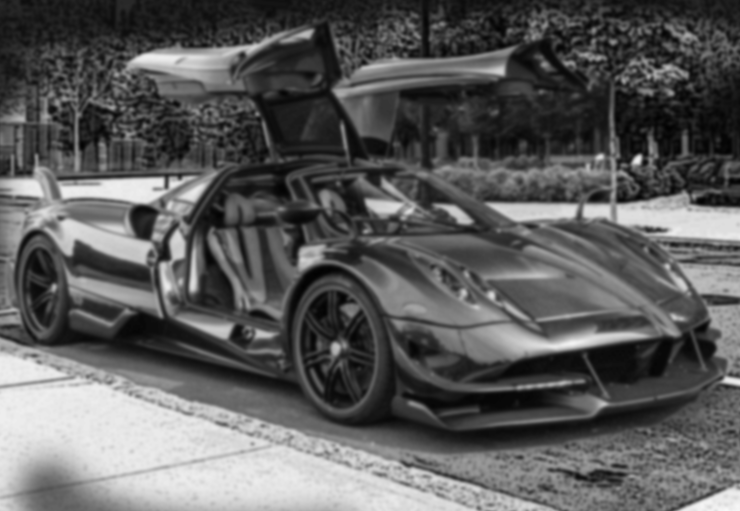

In [7]:
import time
recurse_cnt = 10
start = time.time()
convolution = native_recurse_pooling(green, width, recurse_cnt, False, cpp_function_ptr)
print(round((time.time()-start),2), ' seconds')
display_channel(convolution, width - (recurse_cnt))

# Max Pooling  
### 255 = white

1.15  seconds


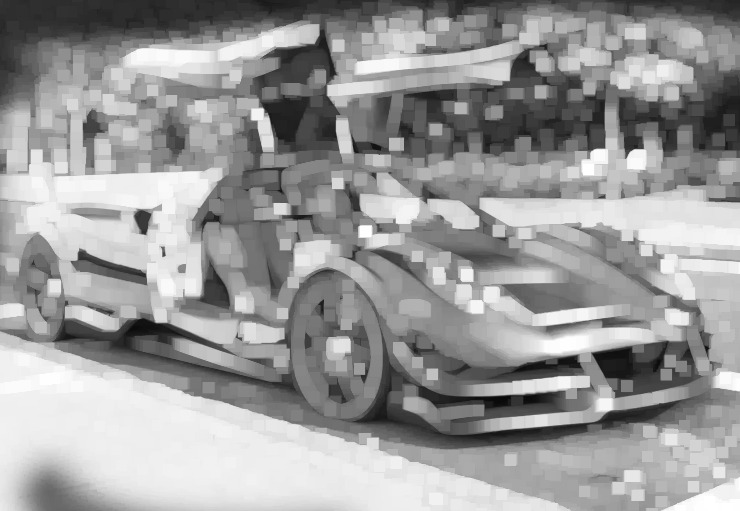

In [8]:
import time
recurse_cnt = 10
start = time.time()
convolution = native_recurse_pooling(green, width, recurse_cnt, True, cpp_function_ptr)
print(round((time.time()-start),2), ' seconds')
display_channel(convolution, width - (recurse_cnt))

# NEXT  -  Python vs C++

http://localhost:8888/notebooks/4_Compare_Performance_Python_VS_C%2B%2B.ipynb

![raw](./imgs/lambo.jpg)